In [1]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn

from platform import python_version
from ydata_profiling import ProfileReport

from src.config import DADOS_ORIGINAIS, DADOS_LIMPOS, RELATORIO
from src.graficos import PALETTE

sns.set_theme(palette="terrain")

#pandas configurando para mostrar todas as linhas e colunas
pd.set_option ('display.max_columns', None)
#configurando pandas para não mostrar notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)


bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")

Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.9.2
NumPy                |     1.26.4
Pandas               |      2.2.3
Scikit-Learn         |      1.5.1
Seaborn              |     0.13.2

Versão do Python: 3.12.3


In [2]:
# Carregamento e preparação dos dados
df = pd.read_csv(DADOS_ORIGINAIS)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [32]:
df.describe(exclude="number")

,diagnosis
count,569
unique,2
top,B
freq,357


In [33]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [34]:
df["diagnosis"].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [35]:
df[df.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [36]:
df[df.duplicated("id")]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [37]:
df = df.drop(columns=["id"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [38]:
df = df.reindex(sorted(df.columns), axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_mean                569 non-null    float64
 1   area_se                  569 non-null    float64
 2   area_worst               569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   compactness_se           569 non-null    float64
 5   compactness_worst        569 non-null    float64
 6   concave points_mean      569 non-null    float64
 7   concave points_se        569 non-null    float64
 8   concave points_worst     569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concavity_se             569 non-null    float64
 11  concavity_worst          569 non-null    float64
 12  diagnosis                569 non-null    object 
 13  fractal_dimension_mean   569 non-null    float64
 14  fractal_dimension_se     5

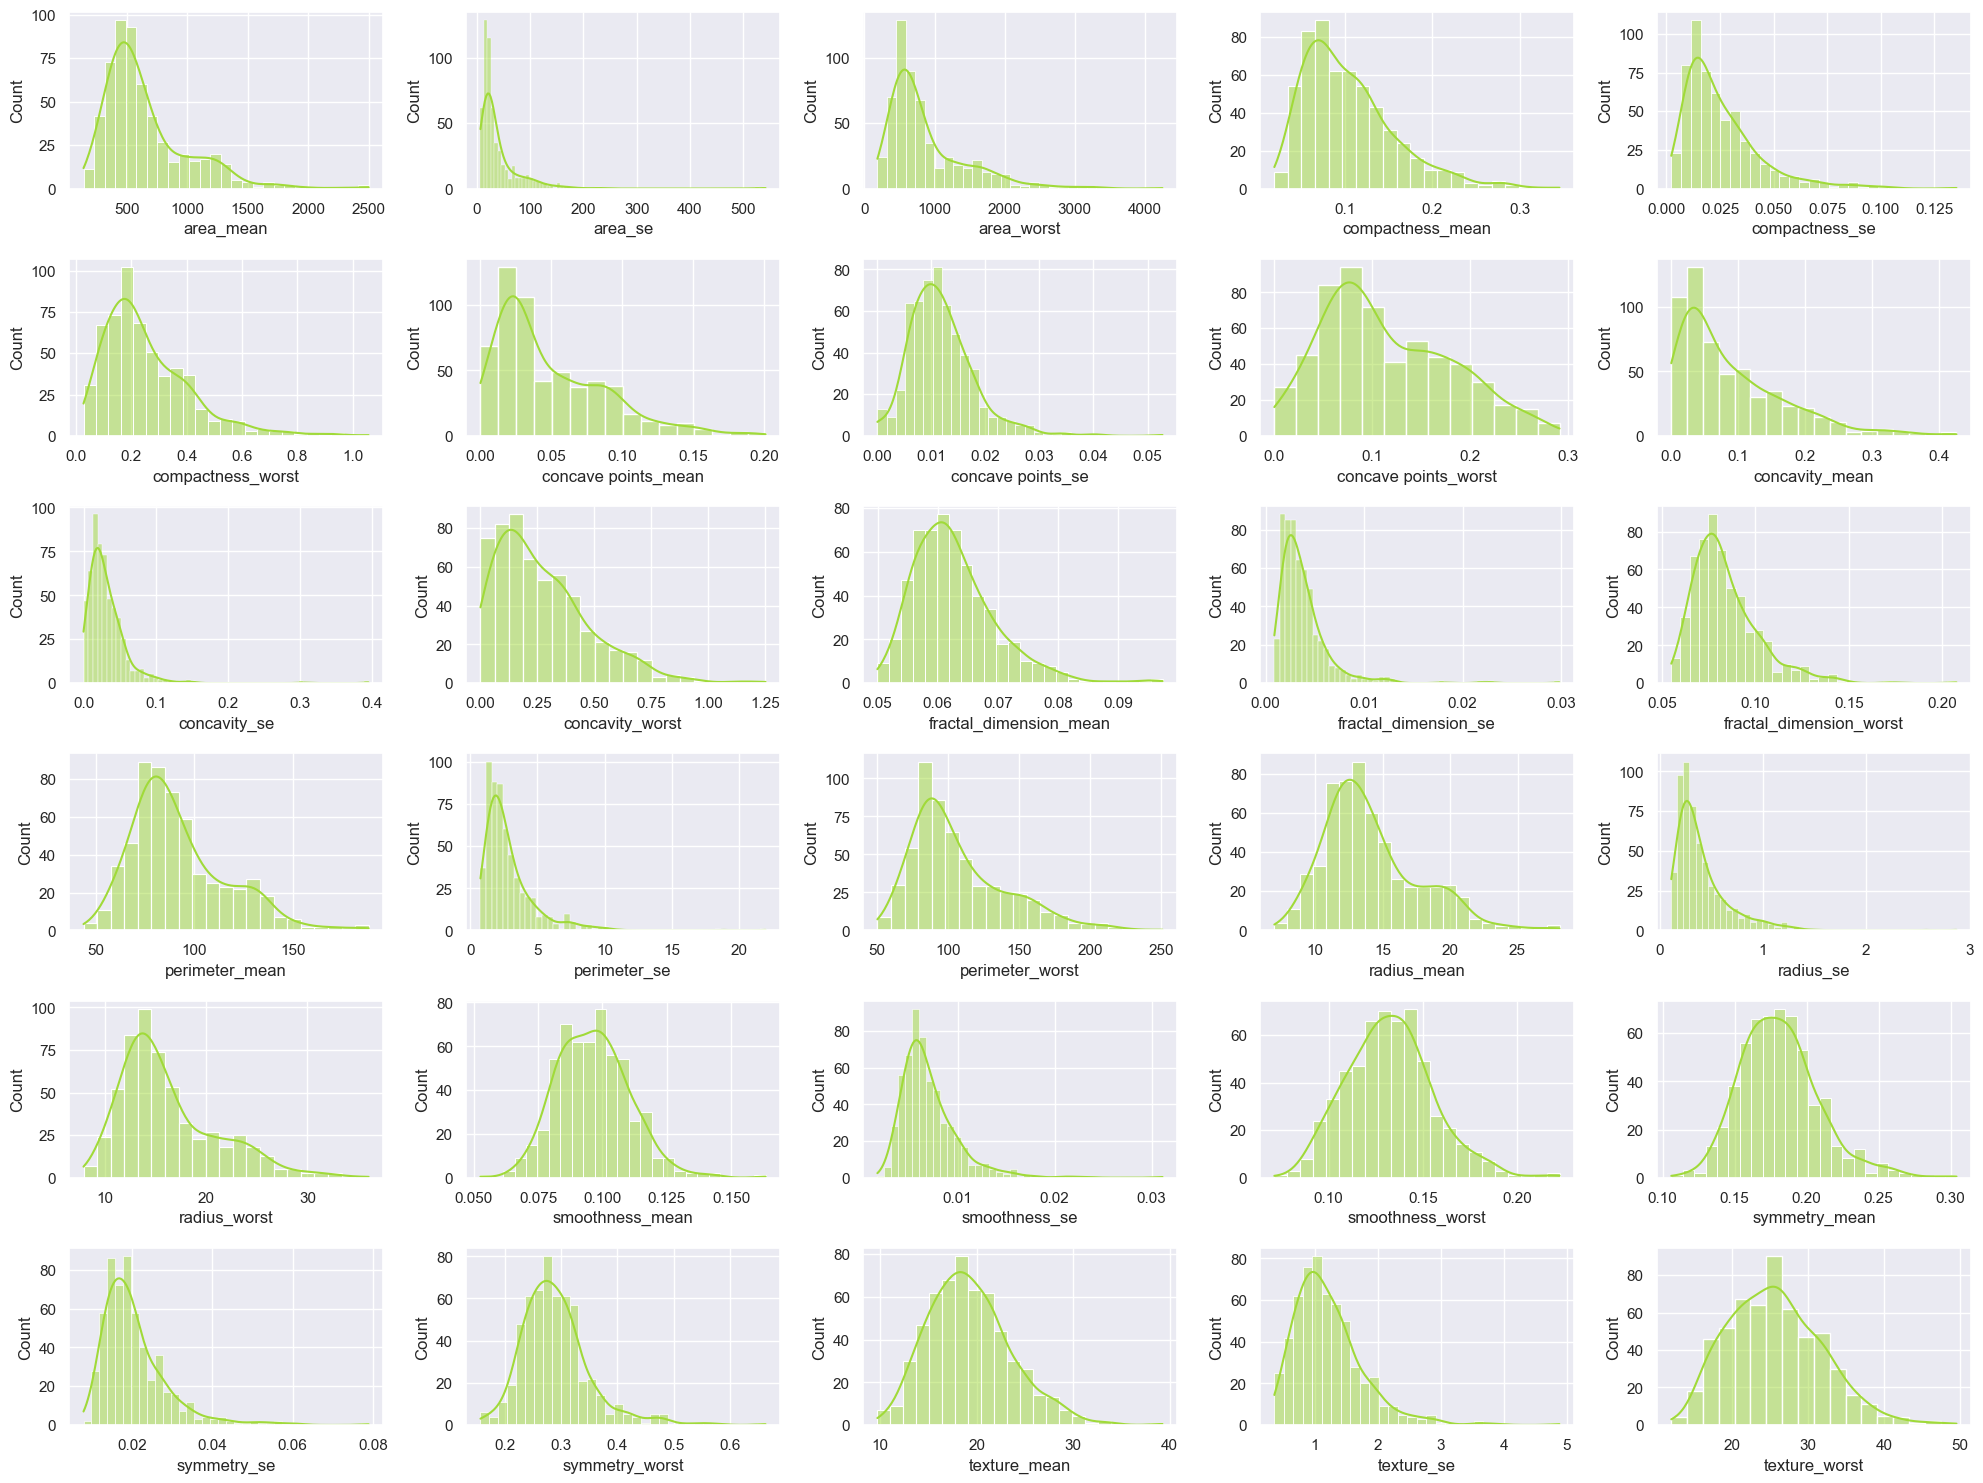

In [39]:
fig, axs = plt.subplots(6, 5, figsize=(20, 15))

for ax, coluna in zip(axs.flatten(), df.select_dtypes("number").columns):
    sns.histplot(x=coluna, ax=ax, data=df, kde=True)

plt.tight_layout()
plt.show()

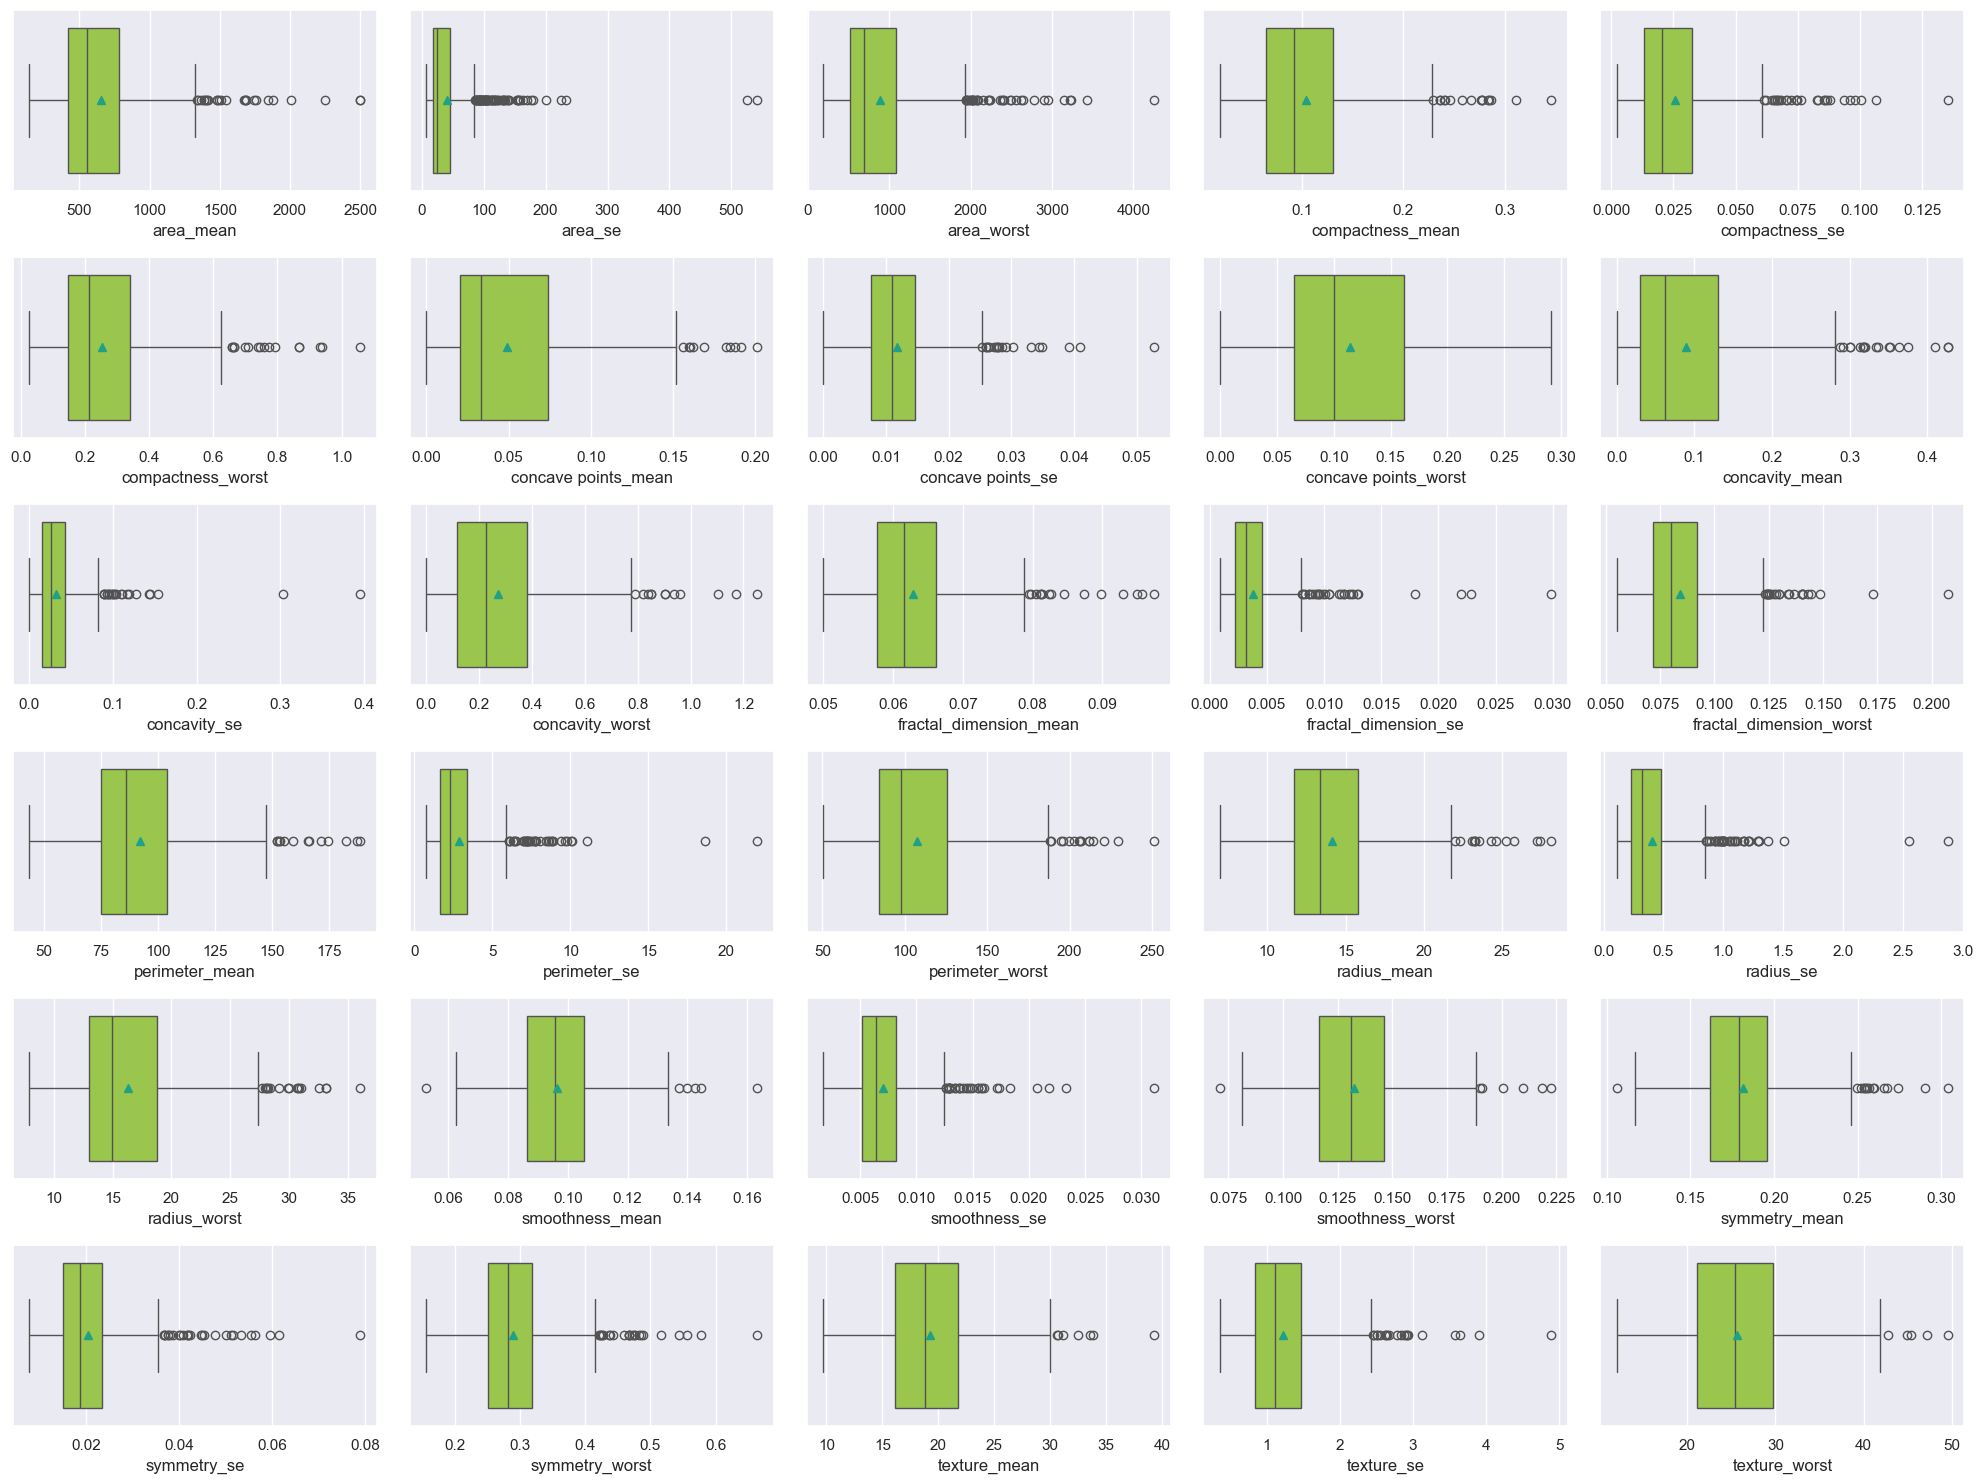

In [40]:
fig, axs = plt.subplots(6, 5, figsize=(20, 15))

for ax, coluna in zip(axs.flatten(), df.select_dtypes("number").columns):
    sns.boxplot(x=coluna, ax=ax, data=df, showmeans=True)

plt.tight_layout()
plt.show()

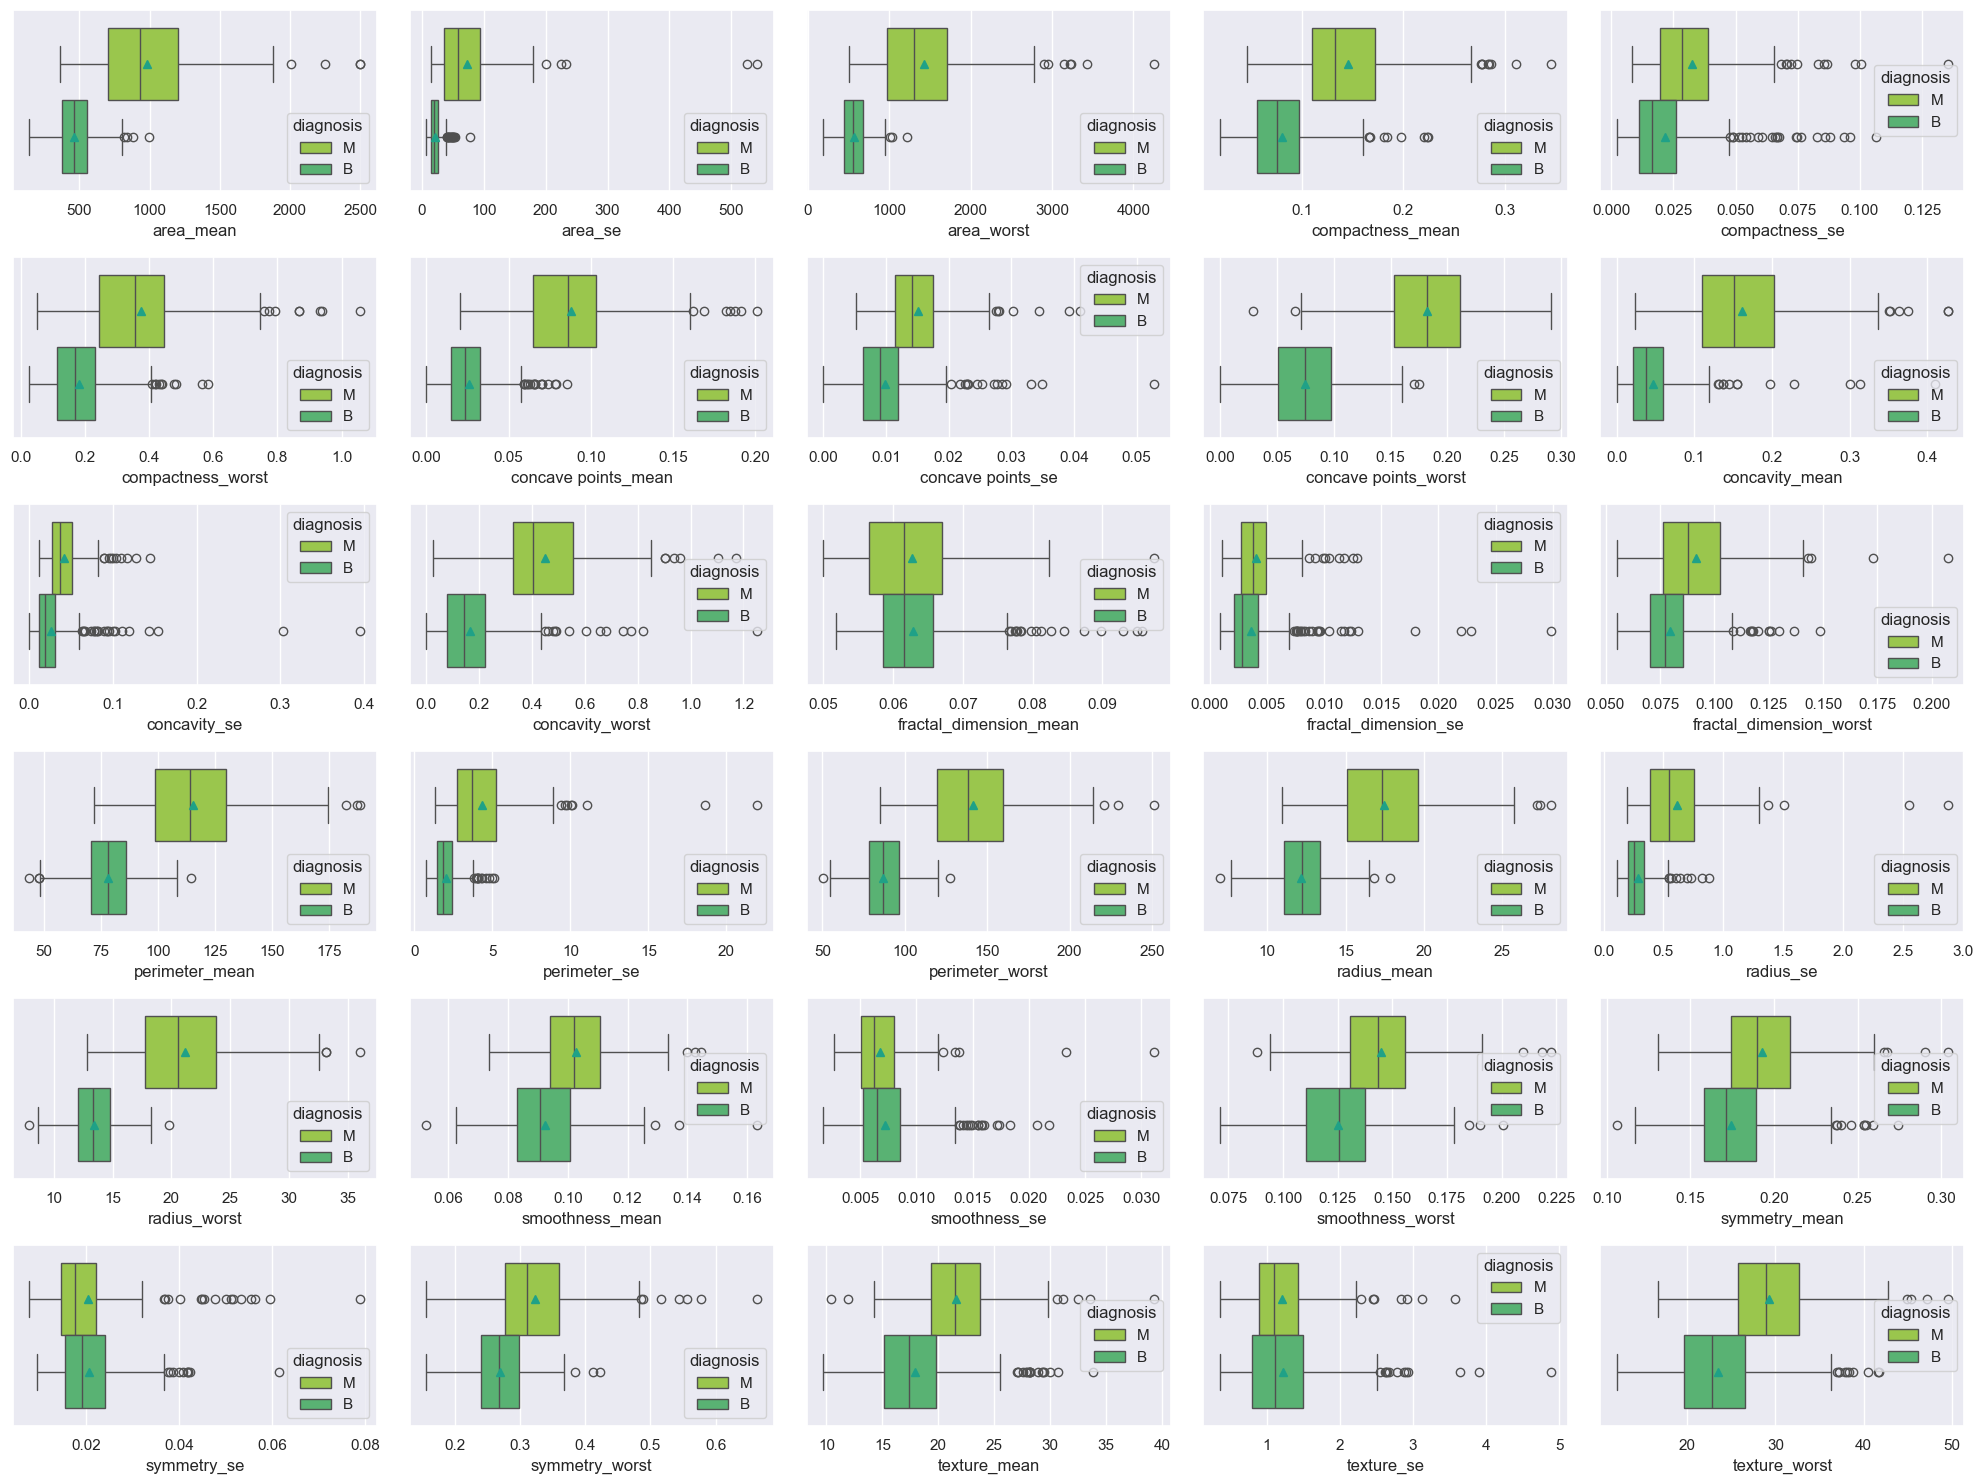

In [41]:
#comparar features em relação a coluna target
fig, axs = plt.subplots(6, 5, figsize=(20, 15))

for ax, coluna in zip(axs.flatten(), df.select_dtypes("number").columns):
    sns.boxplot(x=coluna, ax=ax, data=df, showmeans=True, hue="diagnosis")

plt.tight_layout()
plt.show()

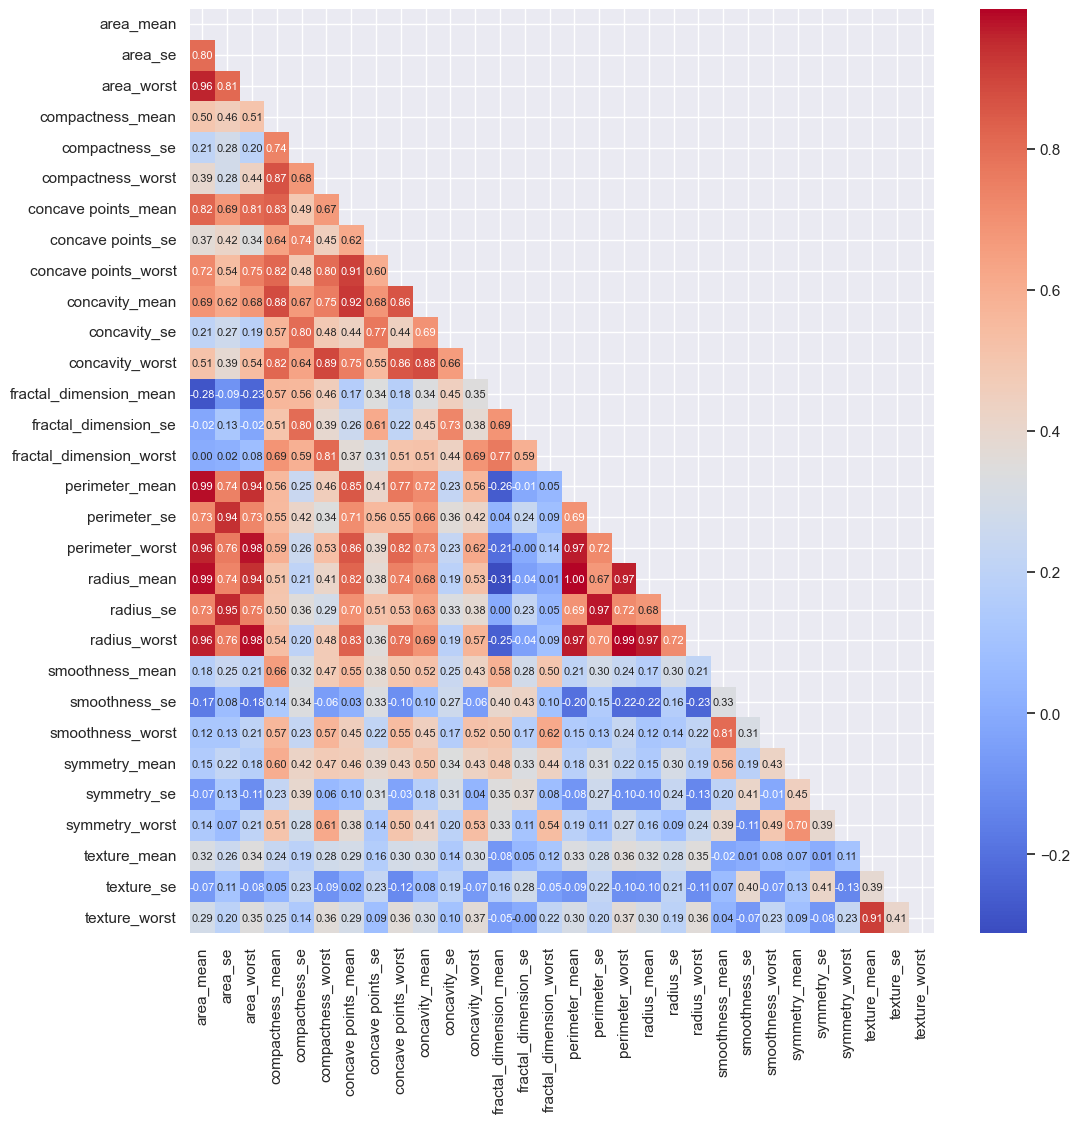

In [42]:
#analisar correlação entre as colunas
matriz = np.triu(df.select_dtypes("number").corr())

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(
    df.select_dtypes("number").corr(),
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    cmap=PALETTE,
    annot_kws={"fontsize": 8}
)

plt.show()

In [43]:
#comparativo testes Mann-Whitney U e T de Stdent
colunas_numericas = df.select_dtypes("number").columns.to_list()

analise_colunas_ttest = {}
analise_colunas_mw = {}

coluna_target = "diagnosis"

In [44]:
classes = df[coluna_target].unique()
classes

array(['M', 'B'], dtype=object)

In [45]:
alfa = 0.05

In [46]:
df.groupby(coluna_target).get_group(classes[1])["area_worst"]

19     711.2
20     630.5
21     314.9
37     545.9
46     242.2
       ...  
558    733.5
559    474.2
560    706.7
561    439.6
568    268.6
Name: area_worst, Length: 357, dtype: float64

In [47]:
agrupamento = df.groupby(coluna_target)

agrupamento

In [48]:
for coluna in colunas_numericas:
    grupo1 = agrupamento.get_group(classes[0])[coluna]
    grupo2 = agrupamento.get_group(classes[1])[coluna]

    estatistica_t, pvalue_t = ttest_ind(grupo1, grupo2)

    analise_colunas_ttest[coluna] = {
        "pvalue": pvalue_t,
        "estatistica": estatistica_t,
        "relacao_significativa": pvalue_t < alfa,
    }
    
    estatistica_mw, pvalue_mw = mannwhitneyu(grupo1, grupo2)

    analise_colunas_mw[coluna] = {
        "pvalue": pvalue_mw,
        "estatistica": estatistica_mw,
        "relacao_significativa": pvalue_mw < alfa,
    }

In [49]:
df_analise_colunas_ttest = pd.DataFrame(analise_colunas_ttest).T
df_analise_colunas_ttest

,pvalue,estatistica,relacao_significativa
area_mean,0.0,23.938687,True
area_se,0.0,15.609343,True
area_worst,0.0,25.72159,True
compactness_mean,0.0,17.698392,True
compactness_se,0.0,7.297077,True
compactness_worst,0.0,17.445374,True
concave points_mean,0.0,29.354319,True
concave points_se,0.0,10.642498,True
concave points_worst,0.0,31.054555,True
concavity_mean,0.0,23.103963,True


In [50]:
df_analise_colunas_ttest[
   df_analise_colunas_ttest["relacao_significativa"] == False
]

,pvalue,estatistica,relacao_significativa
fractal_dimension_mean,0.759937,-0.305711,False
fractal_dimension_se,0.063074,1.86233,False
smoothness_se,0.110297,-1.599365,False
symmetry_se,0.876642,-0.155298,False
texture_se,0.843332,-0.197724,False


In [51]:
df_analise_colunas_mw = pd.DataFrame(analise_colunas_mw).T
df_analise_colunas_mw

,pvalue,estatistica,relacao_significativa
area_mean,0.0,71015.5,True
area_se,0.0,70114.5,True
area_worst,0.0,73400.5,True
compactness_mean,0.0,65374.5,True
compactness_se,0.0,55043.5,True
compactness_worst,0.0,65262.5,True
concave points_mean,0.0,72992.5,True
concave points_se,0.0,59926.0,True
concave points_worst,0.0,73164.0,True
concavity_mean,0.0,70978.5,True


In [52]:
df_analise_colunas_mw[
   df_analise_colunas_mw["relacao_significativa"] == False
]

,pvalue,estatistica,relacao_significativa
fractal_dimension_mean,0.537186,36671.5,False
smoothness_se,0.213632,35483.5,False
texture_se,0.643693,38719.5,False


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_mean                569 non-null    float64
 1   area_se                  569 non-null    float64
 2   area_worst               569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   compactness_se           569 non-null    float64
 5   compactness_worst        569 non-null    float64
 6   concave points_mean      569 non-null    float64
 7   concave points_se        569 non-null    float64
 8   concave points_worst     569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concavity_se             569 non-null    float64
 11  concavity_worst          569 non-null    float64
 12  diagnosis                569 non-null    object 
 13  fractal_dimension_mean   569 non-null    float64
 14  fractal_dimension_se     5

In [4]:
profile= ProfileReport(df)
profile.to_file(RELATORIO)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/32 [00:00<?, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 162.89it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
df.to_parquet(DADOS_LIMPOS, index=False)

### Conclusão

Conclusão da Análise Exploratória (EDA)

Distribuição dos Dados:

Os histogramas revelaram assimetria significativa na maioria das variáveis.

Boxplots confirmaram a presença generalizada de outliers nos dados.

Relação com a Variável Target:

A visualização por hue nos boxplots demonstrou padrões distintos entre as classes (benigno/maligno).

Correlações altas (>0.8) entre variáveis morfológicas (área, perímetro, raio) foram identificadas, como esperado biologicamente.

Testes Estatísticos:

Tanto o teste T de Student quanto Mann-Whitney U corroboraram diferenças significativas (p < 0.05) entre as classes para todas as variáveis numéricas.

Essa convergência de resultados valida as observações visuais dos gráficos.

Insight: A combinação de técnicas visuais (histogramas, boxplots, matriz de correlação) e testes estatísticos proporcionou uma compreensão robusta da estrutura dos dados e sua relação com o diagnóstico.


### Conclusion

Exploratory Data Analysis (EDA) Conclusion

Data Distribution:

Histograms revealed significant skewness in most variables.

Boxplots confirmed widespread presence of outliers.

Relationship with Target Variable:

Hue-stratified boxplots showed distinct patterns between classes (benign/malignant).

High correlations (>0.8) among morphological variables (area, perimeter, radius) were identified, as biologically expected.

Statistical Tests:

Both Student’s T-test and Mann-Whitney U confirmed significant differences (p < 0.05) between classes for all numerical variables.

This convergence validates the visual observations from plots.

Key Insight: The synergy between visual techniques (histograms, boxplots, correlation matrix) and statistical tests provided a robust understanding of data structure and its relationship with diagnosis.